In [89]:
import pandas as pd
energy = pd.read_csv("/Users/fabiolarojas/Documents/data-science/dtsc2103:2/2302project/energydf.csv")
energy.head()

,time,generation biomass,generation fossil,generation hydro,generation nuclear,generation solar,generation waste,generation wind onshore,generation other,generation other renewable,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,10156.0,3813.0,7096.0,49.0,196.0,6378.0,43.0,73.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,10437.0,3587.0,7096.0,50.0,195.0,5890.0,43.0,71.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,9918.0,3508.0,7099.0,50.0,196.0,5461.0,43.0,73.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,8859.0,3231.0,7098.0,50.0,191.0,5238.0,43.0,75.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,8313.0,3499.0,7097.0,42.0,189.0,4935.0,43.0,74.0,21785.0,20264.0,38.41,56.04


In [90]:
energy['time'].dtype

dtype('O')

In [91]:
try:
    energy['time'] = pd.to_datetime(energy['time'], utc=True)
    print("Successfully converted 'time' column to datetime type.")
except ValueError as e:
    print("Error encountered while converting 'time' column:", e)

energy['time'].dtype

Successfully converted 'time' column to datetime type.


datetime64[ns, UTC]

# winter energy

In [115]:

energy['year'] = energy['time'].dt.year
energy['month'] = energy['time'].dt.month

winter_months = [12, 1, 2, 3]

winter_energy = energy[(energy['year'].isin([2015, 2016, 2017, 2018])) & (energy['month'].isin(winter_months))]

winter_energy = winter_energy.drop(['year', 'month'], axis=1)
winter_energy.head()

,time,generation biomass,generation fossil,generation hydro,generation nuclear,generation solar,generation waste,generation wind onshore,generation other,generation other renewable,total load forecast,total load actual,price day ahead,price actual
1,2015-01-01 00:00:00+00:00,449.0,10437.0,3587.0,7096.0,50.0,195.0,5890.0,43.0,71.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,9918.0,3508.0,7099.0,50.0,196.0,5461.0,43.0,73.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,8859.0,3231.0,7098.0,50.0,191.0,5238.0,43.0,75.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,8313.0,3499.0,7097.0,42.0,189.0,4935.0,43.0,74.0,21785.0,20264.0,38.41,56.04
5,2015-01-01 04:00:00+00:00,410.0,7962.0,3804.0,7098.0,34.0,188.0,4618.0,43.0,74.0,21441.0,19905.0,35.72,53.63


In [93]:
winter_energy.describe()

,generation biomass,generation fossil,generation hydro,generation nuclear,generation solar,generation waste,generation wind onshore,generation other,generation other renewable,total load forecast,total load actual,price day ahead,price actual
count,11616.000000,11616.000000,11616.000000,11616.00000,11616.000000,11616.000000,11616.000000,11616.000000,11616.000000,11616.000000,11616.000000,11616.000000,11616.000000
mean,388.760417,10085.145145,4619.597968,6512.48261,1143.265065,261.933970,6332.637741,63.727875,85.290548,29159.608299,29127.778926,48.471001,57.141406
std,85.660199,3948.324477,2135.804364,777.68380,1500.528673,55.790518,3510.722520,19.340911,14.265294,4895.881991,4858.008765,16.188861,16.825590
min,101.000000,2673.000000,678.000000,3712.00000,2.000000,39.000000,345.000000,5.000000,14.000000,18105.000000,18041.000000,2.060000,9.330000
25%,332.000000,6762.750000,2920.000000,6073.00000,40.000000,220.000000,3426.750000,54.000000,73.000000,24929.750000,24922.750000,39.100000,46.880000
50%,372.000000,9661.500000,4255.000000,6978.00000,355.000000,275.000000,5917.000000,59.000000,87.000000,29257.000000,29234.000000,49.270000,57.450000
75%,462.000000,12912.000000,6183.250000,7100.00000,1942.000000,308.000000,8695.250000,83.000000,97.000000,33252.000000,33192.000000,60.000000,68.742500
max,592.000000,23688.000000,11613.000000,7117.00000,5792.000000,357.000000,17436.000000,106.000000,115.000000,41035.000000,41015.000000,101.990000,112.810000


## feature importance - all cols

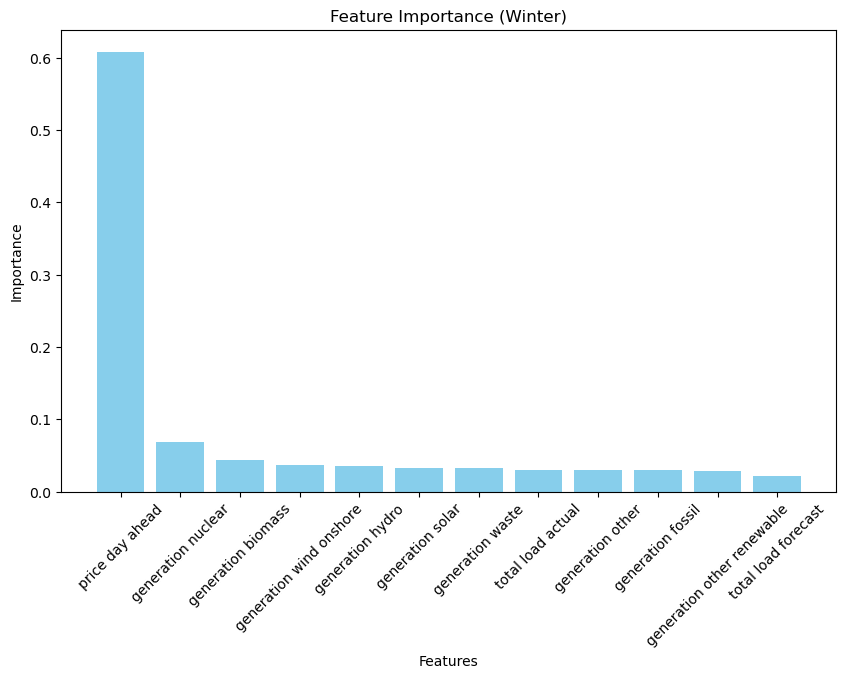

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = winter_energy[["generation biomass", "generation fossil", "generation hydro", "generation nuclear", "generation solar", 
           "generation waste", "generation wind onshore", "generation other", "generation other renewable", 
                  "total load forecast", "total load actual", "price day ahead"]]
y = winter_energy["price actual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Get feature importance
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize the feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.title('Feature Importance (Winter)')
plt.show()

## feature importance - generation cols

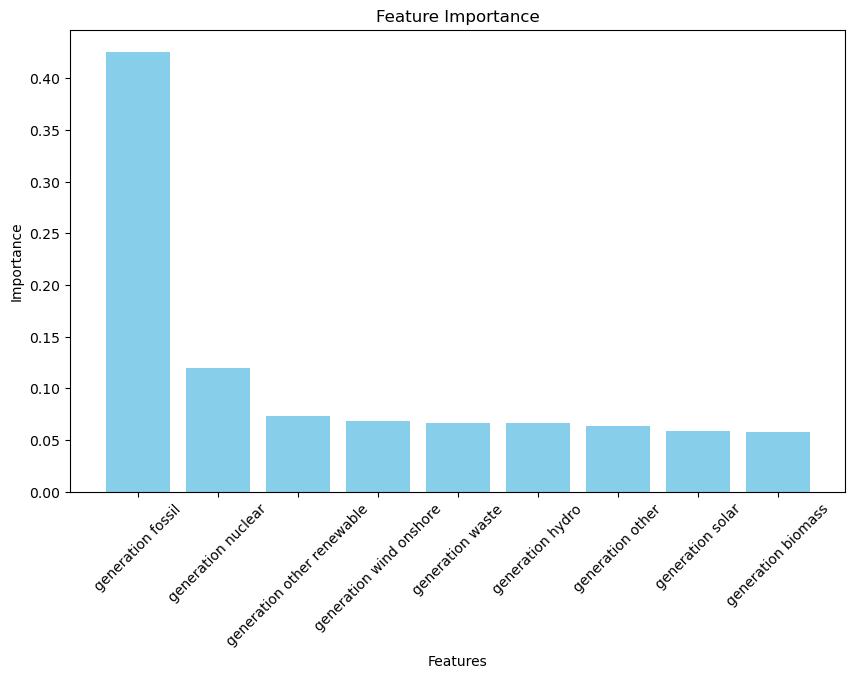

In [95]:

X = winter_energy[["generation biomass", "generation fossil", "generation hydro", "generation nuclear", "generation solar", 
           "generation waste", "generation wind onshore", "generation other", "generation other renewable"]]
y = winter_energy["price actual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Get feature importance
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize the feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.show()

## correlation - all cols

In [96]:
# Calculate correlation coefficients
correlation_matrix = winter_energy.corr()
correlation_with_price_actual = correlation_matrix['price actual'].abs().sort_values(ascending=False)

# Select top correlated predictor variables
top_predictors = correlation_with_price_actual[1:10]  # Excluding 'price actual' itself
print("Top predictor variables:")
print(top_predictors)

Top predictor variables:
price day ahead               0.744152
generation fossil             0.572490
total load forecast           0.495385
total load actual             0.493462
generation other renewable    0.335710
generation waste              0.244964
generation wind onshore       0.189171
generation hydro              0.158044
generation solar              0.066265
Name: price actual, dtype: float64


/var/folders/l6/r_xvzzfd4bz5k_gjy82lbn6r0000gn/T/ipykernel_779/252529705.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = winter_energy.corr()


## regression models (same predictors as summer model)

### linear regression

In [120]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

X = winter_energy[["price day ahead", "generation fossil", "total load forecast", 
                   "generation nuclear", "generation other renewable", "generation waste",
                   "generation biomass"]]
y = winter_energy["price actual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

# Get coefficients
coefficients = lr.coef_

# Create a DataFrame to display feature names and their coefficients
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(coefficients_df)

# Intercept
print(f"Intercept: {lr.intercept_}")

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

                      Feature  Coefficient
0             price day ahead     0.816833
1           generation fossil    -0.000344
2         total load forecast     0.000426
3          generation nuclear     0.000111
4  generation other renewable     0.018626
5            generation waste    -0.032762
6          generation biomass     0.000518
Intercept: 14.625227381491271
R-squared: 0.5363387593913542
Mean Absolute Error: 7.547350228979988
Mean Squared Error: 139.7306096976694
Root Mean Squared Error: 11.820770266681837


### k nearest neighbors

In [121]:
from sklearn.neighbors import KNeighborsRegressor

k = 5 
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

r_squared = knn_model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 

print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


R-squared: 0.4671169898959807
Mean Absolute Error: 9.4595
Mean Squared Error: 160.59152971600687
Root Mean Squared Error: 12.672471334195508


### random forest regressor

In [124]:

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

r_squared = rf_model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 

# Number of samples
n = len(y)

# Number of predictors (features)
k = X.shape[1]

# Calculate adjusted R^2
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

print("R-squared:", r_squared)
print("Adjusted R^2:", adjusted_r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.8317056498789489
Adjusted R^2: 0.8316041629345272
Mean Absolute Error: 4.194308950086059
Mean Squared Error: 50.71778723668675
Root Mean Squared Error: 7.121642172749678


### xgboost

In [101]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

r_squared = xgb_model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


R-squared: 0.8191440594073464
Mean Absolute Error: 4.752421125224864
Mean Squared Error: 54.503393066204346
Root Mean Squared Error: 7.382641333980972


## regression models (winter-specific predictors)

### linear regression

In [102]:

X = winter_energy[["price day ahead", "generation fossil", "total load forecast", 
                   "generation nuclear", "generation other renewable", "generation waste", 
                   "generation biomass"]]
y = winter_energy["price actual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

# Get coefficients
coefficients = lr.coef_

# Create a DataFrame to display feature names and their coefficients
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(coefficients_df)

# Intercept
print(f"Intercept: {lr.intercept_}")

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

                      Feature  Coefficient
0             price day ahead     0.816833
1           generation fossil    -0.000344
2         total load forecast     0.000426
3          generation nuclear     0.000111
4  generation other renewable     0.018626
5            generation waste    -0.032762
6          generation biomass     0.000518
Intercept: 14.625227381491271
R-squared: 0.5363387593913542
Mean Absolute Error: 7.547350228979988
Mean Squared Error: 139.7306096976694
Root Mean Squared Error: 11.820770266681837


### k nearest neighbors

In [103]:

k = 5 
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

r_squared = knn_model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 

print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


R-squared: 0.4671169898959807
Mean Absolute Error: 9.4595
Mean Squared Error: 160.59152971600687
Root Mean Squared Error: 12.672471334195508


### random forest regressor

In [104]:

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

r_squared = rf_model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Number of samples
n = len(y)

# Number of predictors (features)
k = X.shape[1]

# Calculate adjusted R^2
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

print("R-squared:", r_squared)
print("Adjusted R^2:", adjusted_r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.8317056498789489
Adjusted R^2: 0.8316041629345272
Mean Absolute Error: 4.194308950086059
Mean Squared Error: 50.71778723668675
Root Mean Squared Error: 7.121642172749678


### xgboost

In [105]:

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

r_squared = xgb_model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


R-squared: 0.8422589803754794
Mean Absolute Error: 4.4046921884172345
Mean Squared Error: 47.537397815553575
Root Mean Squared Error: 6.894736964928653


# summer energy

In [106]:

energy['year'] = energy['time'].dt.year
energy['month'] = energy['time'].dt.month

summer_months = [6, 7, 8, 9]

summer_energy = energy[(energy['year'].isin([2015, 2016, 2017, 2018])) & (energy['month'].isin(summer_months))]

summer_energy = summer_energy.drop(['year', 'month'], axis=1)
summer_energy.head()

,time,generation biomass,generation fossil,generation hydro,generation nuclear,generation solar,generation waste,generation wind onshore,generation other,generation other renewable,total load forecast,total load actual,price day ahead,price actual
3597,2015-06-01 00:00:00+00:00,495.0,11151.0,2877.0,7098.0,31.0,244.0,2815.0,43.0,72.0,21585.0,22118.0,46.00,54.54
3598,2015-06-01 01:00:00+00:00,495.0,10300.0,3010.0,7099.0,31.0,248.0,3008.0,43.0,73.0,20453.0,21015.0,43.84,53.87
3599,2015-06-01 02:00:00+00:00,491.0,9901.0,3675.0,7099.0,31.0,248.0,3205.0,43.0,71.0,19751.0,20518.0,40.13,54.20
3600,2015-06-01 03:00:00+00:00,493.0,9764.0,3773.0,7097.0,31.0,246.0,3287.0,43.0,69.0,19559.0,20478.0,40.00,55.87
3601,2015-06-01 04:00:00+00:00,488.0,10188.0,3777.0,7096.0,31.0,246.0,3382.0,43.0,71.0,20002.0,20926.0,43.32,61.28


In [107]:
summer_energy.describe()

,generation biomass,generation fossil,generation hydro,generation nuclear,generation solar,generation waste,generation wind onshore,generation other,generation other renewable,total load forecast,total load actual,price day ahead,price actual
count,11705.000000,11705.000000,11705.000000,11705.000000,11705.000000,11705.000000,11705.000000,11705.000000,11705.000000,11705.000000,11705.000000,11705.000000,11705.000000
mean,394.136523,11210.170953,3418.142674,6371.659718,1817.503289,282.146262,4720.703033,60.354891,85.076207,28960.382401,28958.688509,51.454499,59.620023
std,77.858225,3490.922282,1758.172180,731.924683,1834.727596,41.559773,2737.817352,18.559030,14.007779,4467.942664,4463.935182,12.553497,11.345696
min,173.000000,3312.000000,685.000000,3834.000000,3.000000,92.000000,243.000000,4.000000,43.000000,18869.000000,18616.000000,2.790000,22.080000
25%,347.000000,8624.000000,2072.000000,5969.000000,266.000000,259.000000,2673.000000,53.000000,72.000000,25184.000000,25239.000000,43.690000,51.200000
50%,373.000000,11199.000000,2950.000000,6745.000000,763.000000,292.000000,4221.000000,57.000000,87.000000,29080.000000,29080.000000,51.360000,58.290000
75%,415.000000,13583.000000,4373.000000,6969.000000,3553.000000,314.000000,6219.000000,75.000000,96.000000,32459.000000,32404.000000,61.040000,68.390000
max,590.000000,24469.000000,10807.000000,7117.000000,5676.000000,355.000000,16284.000000,102.000000,119.000000,40625.000000,40693.000000,86.990000,89.180000


## feature importance - all cols

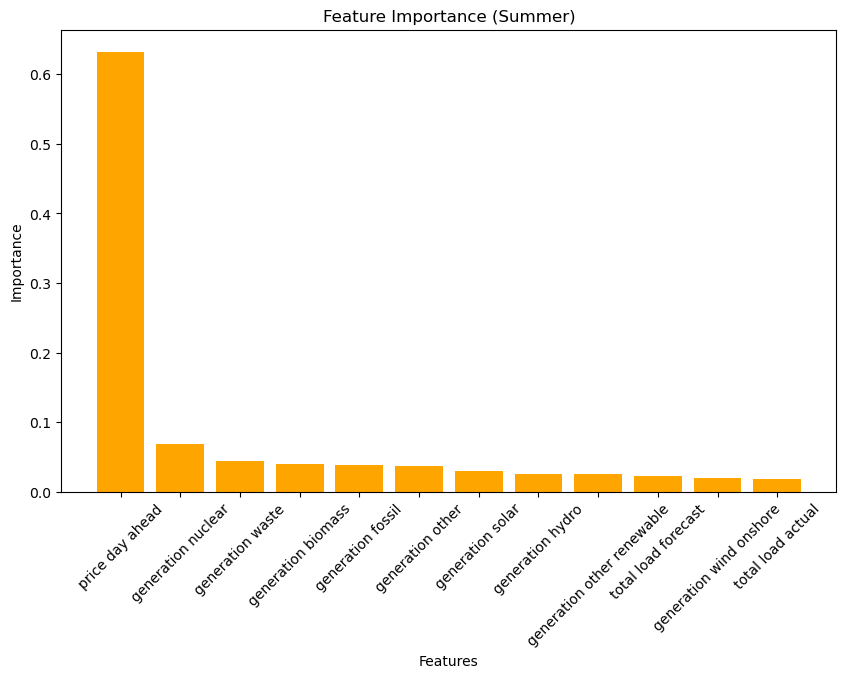

In [126]:
X = summer_energy[["generation biomass", "generation fossil", "generation hydro", "generation nuclear", "generation solar", 
           "generation waste", "generation wind onshore", "generation other", "generation other renewable", 
                  "total load forecast", "total load actual", "price day ahead"]]
y = summer_energy["price actual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Get feature importance
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize the feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='orange')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.title('Feature Importance (Summer)')
plt.show()

## feature importance - generation cols

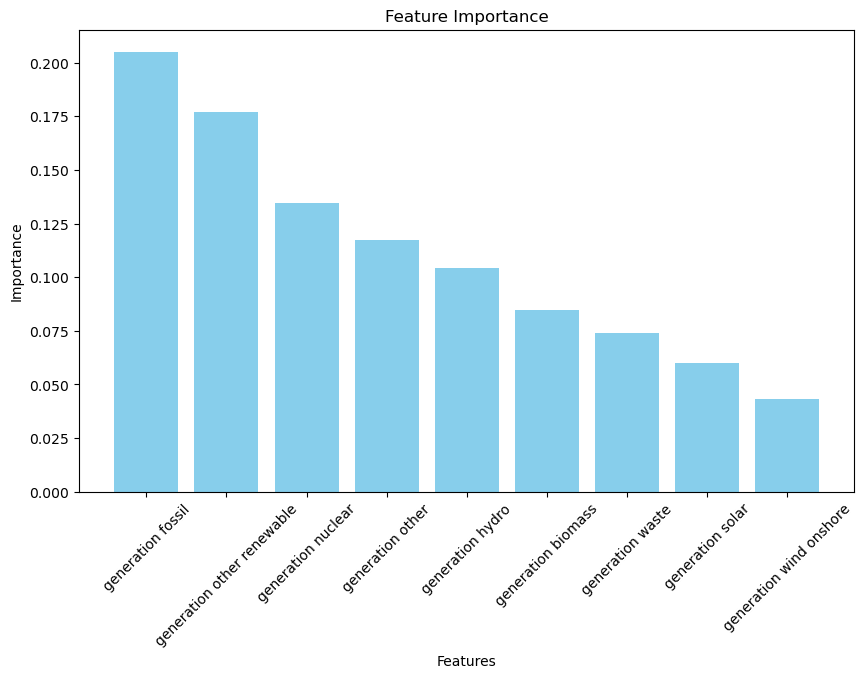

In [109]:

X = summer_energy[["generation biomass", "generation fossil", "generation hydro", "generation nuclear", "generation solar", 
           "generation waste", "generation wind onshore", "generation other", "generation other renewable"]]
y = summer_energy["price actual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
# Get feature importance
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize the feature importances
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.title('Feature Importance')
plt.show()

## correlation - all cols

In [110]:
# Calculate correlation coefficients
correlation_matrix = summer_energy.corr()
correlation_with_price_actual = correlation_matrix['price actual'].abs().sort_values(ascending=False)

# Select top correlated predictor variables
top_predictors = correlation_with_price_actual[1:10]  # Excluding 'price actual' itself
print("Top predictor variables:")
print(top_predictors)

Top predictor variables:
price day ahead            0.747601
generation fossil          0.406931
total load forecast        0.399753
total load actual          0.398894
generation biomass         0.276442
generation wind onshore    0.259788
generation other           0.206167
generation solar           0.199393
generation hydro           0.197596
Name: price actual, dtype: float64


/var/folders/l6/r_xvzzfd4bz5k_gjy82lbn6r0000gn/T/ipykernel_779/2766790270.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = summer_energy.corr()


## regression models

### linear regression

In [116]:

X = summer_energy[["price day ahead", "generation fossil", "total load forecast", 
                   "generation nuclear", "generation other renewable", "generation waste", "generation biomass"]]
y = summer_energy["price actual"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)

# Get coefficients
coefficients = lr.coef_

# Create a DataFrame to display feature names and their coefficients
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(coefficients_df)

# Intercept
print(f"Intercept: {lr.intercept_}")

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

                      Feature  Coefficient
0             price day ahead     0.776017
1           generation fossil    -0.000892
2         total load forecast     0.000571
3          generation nuclear    -0.001218
4  generation other renewable    -0.043645
5            generation waste    -0.036331
6          generation biomass     0.013277
Intercept: 29.64641266720129
R-squared: 0.6687143060176688
Mean Absolute Error: 4.6619744214263905
Mean Squared Error: 42.28983072202916
Root Mean Squared Error: 6.503063179919842


### k nearest neighbors

In [117]:

k = 5  
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

r_squared = knn_model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 

print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


R-squared: 0.33365175011918846
Mean Absolute Error: 7.0881990602306715
Mean Squared Error: 85.06179168389578
Root Mean Squared Error: 9.222894973049177


### random forest regressor

In [118]:

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

r_squared = rf_model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 

# Number of samples
n = len(y)

# Number of predictors (features)
k = X.shape[1]

# Calculate adjusted R^2
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

print("R-squared:", r_squared)
print("Adjusted R^2:", adjusted_r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.909386409104208
Adjusted R^2: 0.9093321819402966
Mean Absolute Error: 2.052678769756515
Mean Squared Error: 11.567156353882956
Root Mean Squared Error: 3.4010522421572644


### xgboost

In [119]:

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

r_squared = xgb_model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 

print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


R-squared: 0.9131939529493077
Mean Absolute Error: 2.229311546055184
Mean Squared Error: 11.081109453576536
Root Mean Squared Error: 3.3288300427592477


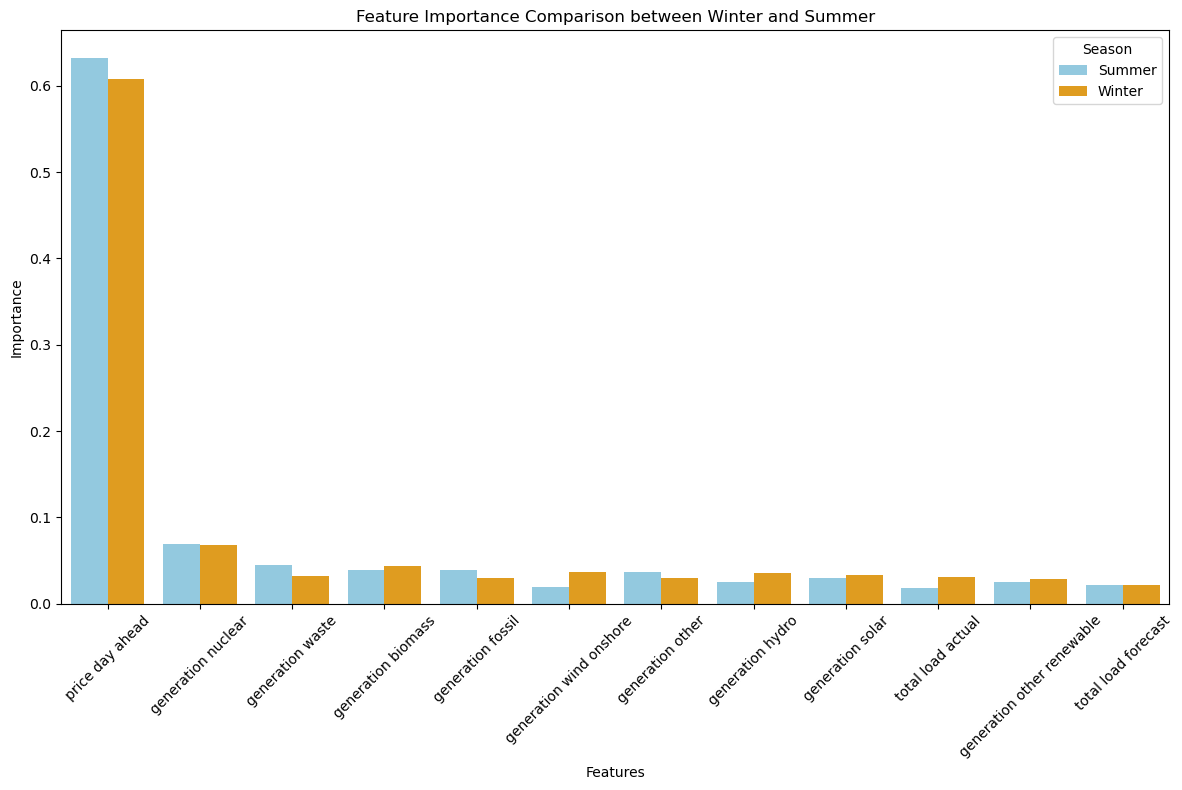

In [130]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have winter_energy and summer_energy DataFrames

# Extracting features and target for winter data
X_winter = winter_energy[["generation biomass", "generation fossil", "generation hydro", "generation nuclear", "generation solar", 
                           "generation waste", "generation wind onshore", "generation other", "generation other renewable", 
                           "total load forecast", "total load actual", "price day ahead"]]
y_winter = winter_energy["price actual"]

# Extracting features and target for summer data
X_summer = summer_energy[["generation biomass", "generation fossil", "generation hydro", "generation nuclear", "generation solar", 
                           "generation waste", "generation wind onshore", "generation other", "generation other renewable", 
                           "total load forecast", "total load actual", "price day ahead"]]
y_summer = summer_energy["price actual"]

# Splitting winter data into train and test sets
X_train_winter, X_test_winter, y_train_winter, y_test_winter = train_test_split(X_winter, y_winter, test_size=0.2, random_state=42)

# Splitting summer data into train and test sets
X_train_summer, X_test_summer, y_train_summer, y_test_summer = train_test_split(X_summer, y_summer, test_size=0.2, random_state=42)

# Initialize and train the Random Forest models for winter and summer
rf_winter = RandomForestRegressor(n_estimators=100, random_state=42)
rf_winter.fit(X_train_winter, y_train_winter)

rf_summer = RandomForestRegressor(n_estimators=100, random_state=42)
rf_summer.fit(X_train_summer, y_train_summer)

# Get feature importances for winter and summer
feature_importances_winter = rf_winter.feature_importances_
feature_importances_summer = rf_summer.feature_importances_

# Create DataFrames to visualize the feature importances for winter and summer
features_df_winter = pd.DataFrame({'Feature': X_winter.columns, 'Importance': feature_importances_winter})
features_df_winter['Season'] = 'Winter'

features_df_summer = pd.DataFrame({'Feature': X_summer.columns, 'Importance': feature_importances_summer})
features_df_summer['Season'] = 'Summer'

# Concatenate the DataFrames for winter and summer
combined_features_df = pd.concat([features_df_winter, features_df_summer])

# Sort the combined DataFrame in descending order by Importance
combined_features_df = combined_features_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Importance', hue='Season', data=combined_features_df, palette=['skyblue', 'orange'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison between Winter and Summer')
plt.xticks(rotation=45)
plt.legend(title='Season')
plt.tight_layout()
plt.show()
